# 국민청원 데이터로 청원 카테고리 분류하기

* 청원의 카테고리를 분류해 봅니다.

In [1]:
# 필요한 모듈들을 불러옵니다.
import pandas as pd
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.23.4
1.16.4


In [2]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'



In [3]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어옵니다.
petitions = pd.read_csv('petition.csv', parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 봅니다.
petitions.shape

(395547, 8)

In [4]:
# 전체 데이터 중 투표가 500건 이상인 데이터를 기준으로 가져옵니다.
df = petitions.loc[(petitions['votes'] > 500)].copy()
df.shape

(5388, 8)

In [5]:
category_count = df['category'].value_counts()
category_count

인권/성평등         699
육아/교육          606
안전/환경          526
교통/건축/국토       503
보건복지           492
정치개혁           466
기타             444
문화/예술/체육/언론    308
행정             264
외교/통일/국방       261
일자리            250
경제민주화          191
반려동물           160
미래              86
성장동력            52
저출산/고령화대책       44
농산어촌            36
Name: category, dtype: int64

In [6]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어옵니다.
petitions = pd.read_csv('petition.csv', parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 봅니다.
petitions.shape

(395547, 8)

In [7]:
petitions.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [8]:
# 전체 데이터 중 투표가 1000건 이상인 데이터를 기준으로 가져옵니다. 아웃라이어 데이터 제거를 위해 10만건 이상 데이터도 제거합니다.
df = petitions.loc[(petitions['votes'] > 1000) & (petitions['votes'] < 100000)].copy()

# 수가 줄어들었음을 확인할 수 있습니다.
df.shape

(3359, 8)

In [9]:
# 카테고리별 국민청원 수를 확인 해 봅니다. 
category_count = df['category'].value_counts()
category_count

인권/성평등         433
육아/교육          402
안전/환경          331
보건복지           321
교통/건축/국토       303
정치개혁           271
기타             270
문화/예술/체육/언론    197
외교/통일/국방       161
행정             155
일자리            154
반려동물           118
경제민주화          111
미래              56
성장동력            29
저출산/고령화대책       28
농산어촌            19
Name: category, dtype: int64

In [10]:
# 예측값과 실제값 비교를 위해 컬럼을 하나 더 생성합니다. 카테고리에 해당되는 칼럼을 똑같이 복사해서 새로운 칼럼을 제작합니다.
df['category_pred'] = df['category'].copy()

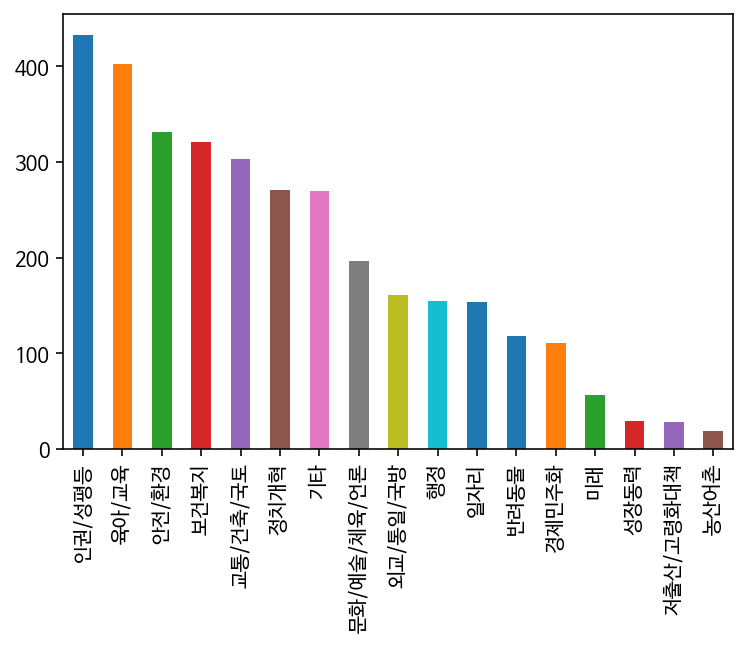

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt

# 나눔 바른고딕이 설치되어 있어야 합니다.
# 해당 폰트가 없다면 설치된 폰트명으로 지정해 주어야 합니다.
plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar')

In [12]:
df.head()

,article_id,start,end,answered,votes,category,title,content,category_pred
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,경제민주화
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",육아/교육
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",육아/교육
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,일자리
38,61,2017-08-19,2017-08-26,0,1185,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...,일자리


In [13]:
# 첫 번째 인덱스를 샘플 데이터로 활용합니다. 
sample_index = df.iloc[0][0]
sample_index

28

In [14]:
sample_title = df['title'][sample_index]
sample_title

'치과위생사 국가고시 날짜 변경 억울합니다'

In [15]:
# 전처리 전 샘플 데이터 
sample_content = petitions['content'][sample_index]
sample_content

'안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생입니다. 다름이 아니라 너무 억울한\\n일이 생겨  이렇게 글을 적어봅니다. 저희 3학년들은 올해 아주 중요한 시험이  있었습니다.3년동안 힘들게 고생하여 이제곧\\n끝난다.조금만 힘을내자 라는 생각으로 견뎌내고 있었는데 갑자기 어제 과 단톡방의  이내용이 사실이냐면서 한장의 사진을\\n보내주었습니다. 그사진은 국시원에서 올린 공지글을 캡쳐한 사진이였습니다.국시원에서 국가고시 날짜가 변경 되었다.\\n그러니 이글을  널리퍼트려줘라라는 의미를 가진 내용이였습니다. 그내용을 읽고 너무 황당하고 어이가 없어서 국시원쪽으로 전화를 해보니 자신들은 어쩔수없었다 나라에서 그날 공무원 시험을 봐야한다 하루의 2번 국시를 볼수없다\\n그래서 자신들과 보건복지부에서  다시 날짜를 정했는데 그날이 내년 18년 1월 5일이다 라는것입니다.\\n그 말을  듣고 더욱 이해할수가 없었습니다. 먼저 그날 시험을 보기로한 국시생은 저희였는데 갑자기 아무런 말도 문자도\\n없고 그공지글도 그냥 통보였습니다. 국가에서보는 시험이 일반 초중고 수행평가도 아니고 갑자기 이런식으로  바뀐다는게\\n말이 됩니까? 고등학생들이 보는 모의고사,수능도 이런식으로  변경 하지않습니다.  통보로 날짜를 변경하는건  저희\\n에비 의료기사들을 무시하는걸로 보입니다. 저희학교 교수님들은 학생들에게 자부심을 가져라 치과위생사라는 직업을 아끼고 사랑하고 자부심을 가져도 되는 직업이니깐  당당 해져도 괜찮다고  말씀하셨습니다. 하지만 저는  그러지 못할꺼같습니다.  아마 저뿐만이아니라 마음 학생들도 자존심도 낮아지고 무시받는다고 생각했을것입니다.\\n17년 12월16일날의 시험을 봐야하는  국시생들은 저희 예비 치과위생사들 입니다. 공무원 시험이 갑자기 잡혀서  봐야한다면 다른날로 정하는게 맞지않을까요? 먼저 그날의 시험을 보기로 한 학생들은 저희입니다\\n왜 갑자기 저희가 양보해야하고  피해를봐야합니까?  저희국시 앞으로 4달남은상

# 전처리 하기 

In [16]:
# 전처리를 진행하는 함수를 제작합니다. 전처리를 하는 이유는 결측치나 노이즈를 제거해줌으로써 온전한 예측을 진행하기 위해서입니다.
def preprocessing(text):
    # 우선 개행문자를 제거한다.
    text= str(text)
    text = re.sub('\\\\n', ' ', text)
    
    # 그 다음 한글, 영문만 남기고 모두 제거하도록 합니다. '가'부터 '힣'까지, 'ㅏ' 부터 'ㅣ' 까지, 대소문자 a부터 z까지만 남기고 제거합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [17]:
# 예측에 도움이 되지 않는 불용어를 제거하는 함수를 제작합니다.
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더', '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜','같은', '같습니다', '없습니다', '위해', '한다']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words) # stops 가 담기지 않은 문장 내 토큰들은 제거합니다.

In [18]:
# 위 샘플데이터에 그대로 전처리 적용
pre_sample_content = preprocessing(sample_content)

In [19]:
pre_sample_content = remove_stopwords(pre_sample_content)

In [20]:
pre_sample_content

'안녕하십니까  대통령님 간단하게 제소개 부터 하겠습니다  치위생과  학년 학생입니다  다름이 아니라 너무 억울한 일이 생겨  이렇게 글을 적어봅니다  저희  학년들은 올해 아주 중요한 시험이  있었습니다  년동안 힘들게 고생하여 이제곧 끝난다 조금만 힘을내자 라는 생각으로 견뎌내고 있었는데 갑자기 어제 과 단톡방의  이내용이 사실이냐면서 한장의 사진을 보내주었습니다  그사진은 국시원에서 올린 공지글을 캡쳐한 사진이였습니다 국시원에서 국가고시 날짜가 변경 되었다  그러니 이글을  널리퍼트려줘라라는 의미를 가진 내용이였습니다  그내용을 읽고 너무 황당하고 어이가 없어서 국시원쪽으로 전화를 해보니 자신들은 어쩔수없었다 나라에서 그날 공무원 시험을 봐야한다 하루의  번 국시를 볼수없다 그래서 자신들과 보건복지부에서  다시 날짜를 정했는데 그날이 내년   년   일이다 라는것입니다  말을  듣고 더욱 이해할수가 없었습니다  먼저 그날 시험을 보기로한 국시생은 저희였는데 갑자기 아무런 말도 문자도 없고 그공지글도 그냥 통보였습니다  국가에서보는 시험이 일반 초중고 수행평가도 아니고 갑자기 이런식으로  바뀐다는게 말이 됩니까  고등학생들이 보는 모의고사 수능도 이런식으로  변경 하지않습니다   통보로 날짜를 변경하는건  저희 에비 의료기사들을 무시하는걸로 보입니다  저희학교 교수님들은 학생들에게 자부심을 가져라 치과위생사라는 직업을 아끼고 사랑하고 자부심을 가져도 되는 직업이니깐  당당 해져도 괜찮다고  말씀하셨습니다  하지만  그러지 못할꺼같습니다   아마 저뿐만이아니라 마음 학생들도 자존심도 낮아지고 무시받는다고 생각했을것입니다    년    일날의 시험을 봐야하는  국시생들은 저희 예비 치과위생사들  공무원 시험이 갑자기 잡혀서  봐야한다면 다른날로 정하는게 맞지않을까요  먼저 그날의 시험을 보기로 학생들은 저희입니다 갑자기 저희가 양보해야하고  피해를봐야합니까   저희국시 앞으로  달남은상태였고 지금 학생들이 지쳐지만   월만 참으면 된다 라는 생각으로  견딘 학

In [21]:
# 해당 데이터를 전처리한 뒤 칼럼으로 추가합니다.
%time df['content_preprocessing'] = df['content'].apply(preprocessing)

Wall time: 418 ms


In [22]:
# 해당 데이터의 불용어를 제거한 뒤 칼럼으로 추가합니다.
%time df['content_preprocessing2'] = df['content_preprocessing'].apply(remove_stopwords)

Wall time: 578 ms


# 학습세트와 테스트세트 만들기
* 학습세트와 테스트세트를 7:3의 비율로 나눠 줍니다.

In [23]:
# 학습세트와 테스트세트를 7대 3으로 나누어줍니다.
df = df.reindex()

In [24]:
df.shape

(3359, 11)

In [25]:
split_count = int(df.shape[0] * 0.7) # 2264
split_count

2351

In [26]:
df_train = df[:split_count].copy() # 학습세트에 70%를 채워줍니다. 
df_train.shape

(2351, 11)

In [27]:
# 학습세트의 상위 5개 항목만 출력해봅니다. 
df_train.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...,경제민주화,존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주...,존경하옵는 문재인대통령님께 중국원양자원이라는 KOSPI상장사의 소액 주주입니...
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",육아/교육,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
24,46,2017-08-19,2017-09-18,0,1933,육아/교육,기간제교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된...",육아/교육,대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된...,대통령님 안녕하세요 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
28,50,2017-08-19,2017-10-18,0,1251,일자리,치과위생사 국가고시 날짜 변경 억울합니다,안녕하십니까? 대통령님 간단하게 제소개 부터 하겠습니다. 저는 치위생과 3학년 학생...,일자리,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 학년 학생...,안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 치위생과 학년 학생입니다...
38,61,2017-08-19,2017-08-26,0,1185,일자리,영어회화전문강사제도는 유지되어야합니다.,1. 영전강의고용안정을 원합니다\n2.1년단위계약직으로 임신 출산육아 매우 곤란합니...,일자리,영전강의고용안정을 원합니다 년단위계약직으로 임신 출산육아 매우 곤란합니다...,영전강의고용안정을 원합니다 년단위계약직으로 임신 출산육아 매우 곤란합니다...


In [28]:
df_test = df[split_count:].copy() # 훈련세트에 나머지 30%를 채워줍니다. 
df_test.shape

(1008, 11)

In [29]:
# 테스트세트의 상위 5개 항목만 출력해봅니다. 
df_test.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2
279854,363354,2018-09-02,2018-10-02,0,3830,육아/교육,저출산 고령사회위원회가 제안한 초등학교 저학년 오후 3시 하교 정책 재고 요청,"저는 현재 초등학교 19년차 교사입니다. 공주교육대학교에서 초등교육을, 한국교원대학...",육아/교육,저는 현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학...,현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학교대학...
279887,363401,2018-09-02,2018-10-02,0,5239,성장동력,구글G- city사업을 청라 유치 원안대로 하게 해주세요,대통령님 안녕하십니까?\n청라주민입니다.\n최근 g city와 관련하여 말씀드립니다...,성장동력,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...
279918,363440,2018-09-02,2018-10-02,0,2544,육아/교육,양육비 미지급 사건에 대한 대책마련 청원,법률사무소 지청 정훈태 변호사입니다.\n미혼모나 부부가 이혼할 경우 양육비부담자가 ...,육아/교육,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...
279982,363533,2018-09-02,2018-10-02,0,1655,기타,스포츠토토(베트맨) 국민 피 빨아먹는 짓 중단하게 해주세요,현재 한국의 스포츠토토는 10년이 훌쩍 지난 것으로 알고 있습니다. 하지만 최근에 ...,기타,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 있습니다 하지만 최근에 ...,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 하지만 최근에 베트맨인지...
280324,364001,2018-09-03,2018-10-03,0,1446,외교/통일/국방,강명구 평화마라토너의 북한 입국을 위한 정부의 지원을 청원합니다,"한반도 평화의 전령, 강명구 평화마라토너는 꼭 1년 전 네덜란드 헤이그 이준열사 기...",외교/통일/국방,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...


## 카테고리 

In [30]:
# 학습세트의 모습을 테스트세트의 카테고리, 그리고 해당 카테고리의 비율로 이루어진 데이터로 만듭니다.
df_train_category_value = pd.DataFrame(df_train['category'].value_counts())
df_train_category_percent = pd.DataFrame(df_train['category'].value_counts(normalize=True))
df_train_category_value.merge(df_train_category_percent, left_index=True, right_index=True)

,category_x,category_y
인권/성평등,308,0.131008
육아/교육,273,0.116121
안전/환경,229,0.097405
보건복지,224,0.095279
정치개혁,219,0.093152
기타,184,0.078265
교통/건축/국토,170,0.072310
문화/예술/체육/언론,146,0.062101
행정,122,0.051893
외교/통일/국방,112,0.047639


In [31]:
# 테스트세트의 모습을 위와 동일하게 제작합니다.
df_test_category_value = pd.DataFrame(df_test['category'].value_counts())
df_test_category_percent = pd.DataFrame(df_test['category'].value_counts(normalize=True))
df_test_category_value.merge(df_test_category_percent, left_index=True, right_index=True)

,category_x,category_y
교통/건축/국토,133,0.131944
육아/교육,129,0.127976
인권/성평등,125,0.124008
안전/환경,102,0.101190
보건복지,97,0.096230
기타,86,0.085317
정치개혁,52,0.051587
문화/예술/체육/언론,51,0.050595
외교/통일/국방,49,0.048611
일자리,49,0.048611


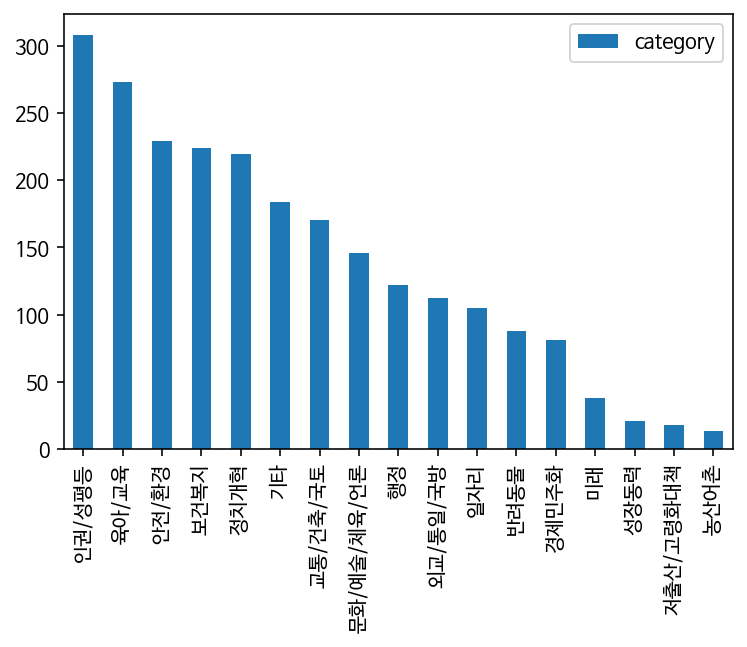

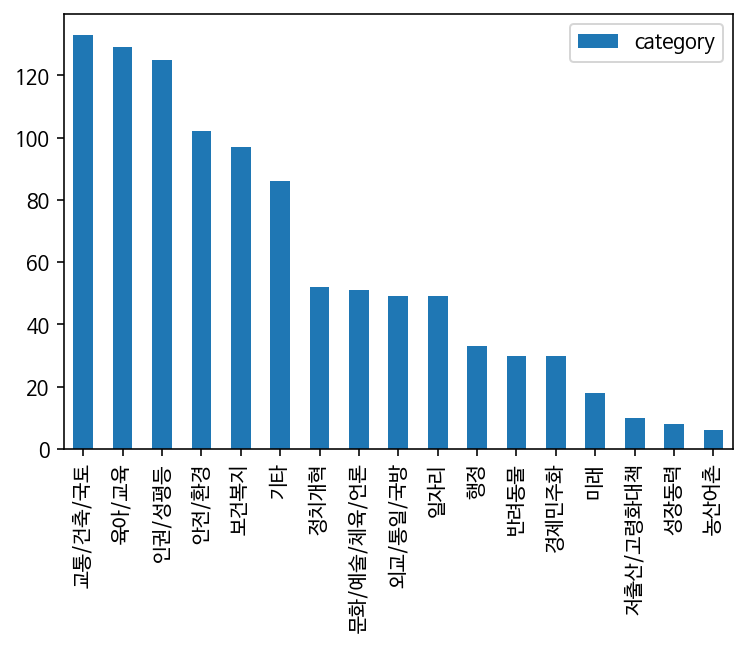

In [32]:
# 그리고 두 세트를 bar plot으로 출력합니다.
df_train_category_value.plot(kind='bar')
df_test_category_value.plot(kind='bar')

# 단어 벡터화 하기

In [33]:
# 학습과 분류를 시키기 위해 먼저 벡터화를 하기로 합니다. 학습이나 분류 전에 텍스트는 컴퓨터가 알아먹을 수 없으므로 벡터화를 진행합니다. (vectorizer를 생성합니다.)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # 캐릭터 단위로 벡터화 할 수도 있습니다.
                             tokenizer = None, # 토크나이저를 따로 지정해 줄 수도 있습니다.
                             preprocessor = None, # 전처리 도구
                             stop_words = None, # 불용어 nltk등의 도구를 사용할 수도 있습니다.
                             min_df = 2, # 토큰이 나타날 최소 문서 개수로 오타나 자주 나오지 않는 특수한 전문용어 제거에 좋다. 
                             ngram_range=(1, 3), # BOW의 단위를 1~3개로 지정합니다.
                             max_features = 2000 # 만들 피처의 수, 단어의 수가 된다.
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2000, min_df=2,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [34]:
%%time 
# 학습세트와 테스트세트를 CounterVectorizer를 이용해 벡터 정규화합니다(fit -> Transform). 정규화하는 이유는 Feature들 끼리 다른 스케일을 통일 시켜주는 역할을 합니다. 
train_feature_vector = vectorizer.fit_transform(df_train['content_preprocessing2'])
train_feature_vector.shape

Wall time: 6.39 s


(2351, 2000)

In [35]:
%%time 
test_feature_vector = vectorizer.fit_transform(df_test['content_preprocessing2'])
test_feature_vector.shape

Wall time: 3.28 s


(1008, 2000)

In [36]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2000


['aid',
 'article',
 'articleview',
 'articleview html',
 'articleview html idxno',
 'a는',
 'a의',
 'cctv',
 'cctv를',
 'cj']

In [37]:
dist = np.sum(train_feature_vector, axis=0)

pd.DataFrame(dist, columns=vocab)

,aid,article,articleview,articleview html,articleview html idxno,a는,a의,cctv,cctv를,cj,...,후에,훨씬,희망을,힘든,힘들게,힘들고,힘들어,힘없는,힘을,힘이
0,102,93,59,80,63,63,41,183,176,85,...,77,64,147,85,40,44,40,38,94,70


In [38]:
# 추가로 TF-IDF 를 이용해 벡터 정규화를 진행합니다. TF-IDF은 통계적 수치 중 하나인데, TF(단어 빈도수)와 IDF(역 - 문서 빈도수)를 곱한 값이다. 이 점수가 높은 단어일 수록 다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어를 의미합니다. 반대로 단어의 중요도가 낮다는 것은 하나의 문서에서 많이 나오지 않고 다른 문서에서 자주 등장하는 단어라는 의미를 갖습니다.
from sklearn.feature_extraction.text import TfidfTransformer # TF-IDF로 가중치를 먹여 벡터를 정규화 합니다. (간단하게 한다)
transformer = TfidfTransformer(smooth_idf=False) # 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지 아니면 그냥 생성할지를 결정합니다. 결국 이 코드에서는 그냥 생성하는 것으로 결정(False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [39]:
%%time 
train_feature_tfidf = transformer.fit_transform(train_feature_vector)
train_feature_tfidf.shape

Wall time: 23 ms


(2351, 2000)

In [40]:
%%time 
test_feature_tfidf = transformer.fit_transform(test_feature_vector)
test_feature_tfidf.shape

Wall time: 14 ms


(1008, 2000)

In [41]:
test_feature_tfidf.shape

(1008, 2000)

# 랜덤 포레스트로 학습시키기
* 공식문서 : http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용해서 분류를 합니다. 
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2018, verbose=0,
                       warm_start=False)

In [43]:
# 학습에 사용할 y_label 을 넣어줍니다.
# 어떤 분야의 청원인지 예측할 것이기 때문에 category를 넣어줍니다.
y_label = df_train['category']
%time forest = forest.fit(train_feature_tfidf, y_label)

Wall time: 947 ms


# 학습이 잘 되었는지 평가하기

In [44]:
# 이제 학습이 잘 되었는 지를 확인합니다. 성능지표는 교차검증(cross-validation)을 통한 accuracy를 확인할 것입니다. 교차검증이란, 선택한 비율만큼 훈련세트와 테스트세트를 분할하여 표본을 만들어준 뒤, 이 표본을 교차하면서 검증하는 모델 평가 방법입니다.
# K-fold 교차검증이란, 데이터를 K개로 쪼개어 하나는 검증 데이터, 나머지(k-1)는 훈련 데이터로 사용되며 검증이 끝나면 검증 데이터를 쪼갠 다른 데이터로 교체 후 검증하는 것을 K번 반복하는 것입니다. 그리고 K번의 성능을 평균으로 구합니다.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

scoring = 'accuracy'
# cross_val_score 의 파라미터는 (모델명, 훈련데이터, 타겟, cv(k-flod), options)입니다.
%time score = cross_val_score(forest, train_feature_vector, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
score

Wall time: 5.35 s


array([0.42038217, 0.38723404, 0.41276596, 0.42553191, 0.38723404])

In [45]:
# 성능지표를 평균으로 뽑고 이를 백분율로 나오게끔 수치를 뽑아봅니다.
round(np.mean(score)*100,2)
# 높지 않은 성능지표가 나왔습니다. 

40.66

# 예측

In [46]:
# 고찰하기 위해 테스트 데이터를 넣고 예측합니다.
y_pred = forest.predict(test_feature_vector)
y_pred[:3]

array(['육아/교육', '육아/교육', '인권/성평등'], dtype=object)

In [47]:
y_pred.shape

(1008,)

In [48]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 줍니다.
output = pd.DataFrame(data={'category_pred':y_pred})
output.head()

,category_pred
0,육아/교육
1,육아/교육
2,인권/성평등
3,육아/교육
4,보건복지


In [49]:
# 0과 1이 어떻게 집계 되었는지 확인합니다.
# 실제 데이터에는 답변 대상 건이 있는데 없는 것으로 예측되었
output['category_pred'].value_counts()

육아/교육          209
인권/성평등         166
보건복지           157
정치개혁           108
안전/환경           87
교통/건축/국토        80
경제민주화           63
반려동물            51
기타              30
문화/예술/체육/언론     26
외교/통일/국방        16
일자리              6
행정               5
저출산/고령화대책        3
미래               1
Name: category_pred, dtype: int64

In [50]:
# 테스트 데이터에 위에 예측한 값을 칼럼으로 추가하고, 예측값과 같으면 1, 다르면 0을 나타내는 칼럼을 또 하나 추가합니다.
df_test['category_pred'] = y_pred

In [51]:
df_test['pred_diff'] = 0
df_test['pred_diff'] = (df_test['category'] == df_test['category_pred'] ) == 1
df_test['pred_diff'] = df_test['pred_diff'].astype(int)
df_test.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
279854,363354,2018-09-02,2018-10-02,0,3830,육아/교육,저출산 고령사회위원회가 제안한 초등학교 저학년 오후 3시 하교 정책 재고 요청,"저는 현재 초등학교 19년차 교사입니다. 공주교육대학교에서 초등교육을, 한국교원대학...",육아/교육,저는 현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학...,현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학교대학...,1
279887,363401,2018-09-02,2018-10-02,0,5239,성장동력,구글G- city사업을 청라 유치 원안대로 하게 해주세요,대통령님 안녕하십니까?\n청라주민입니다.\n최근 g city와 관련하여 말씀드립니다...,육아/교육,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...,0
279918,363440,2018-09-02,2018-10-02,0,2544,육아/교육,양육비 미지급 사건에 대한 대책마련 청원,법률사무소 지청 정훈태 변호사입니다.\n미혼모나 부부가 이혼할 경우 양육비부담자가 ...,인권/성평등,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...,0
279982,363533,2018-09-02,2018-10-02,0,1655,기타,스포츠토토(베트맨) 국민 피 빨아먹는 짓 중단하게 해주세요,현재 한국의 스포츠토토는 10년이 훌쩍 지난 것으로 알고 있습니다. 하지만 최근에 ...,육아/교육,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 있습니다 하지만 최근에 ...,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 하지만 최근에 베트맨인지...,0
280324,364001,2018-09-03,2018-10-03,0,1446,외교/통일/국방,강명구 평화마라토너의 북한 입국을 위한 정부의 지원을 청원합니다,"한반도 평화의 전령, 강명구 평화마라토너는 꼭 1년 전 네덜란드 헤이그 이준열사 기...",보건복지,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...,0


In [52]:
# 맞게 예측한 청원은 1, 틀린 예측은 0으로 표기해서 확인을 해봅니다. 
pred_diff = df_test['pred_diff'].value_counts()
pred_diff

0    825
1    183
Name: pred_diff, dtype: int64

In [53]:
print('전체 {}건의 데이터 중 {}건 예측'.format(y_pred.shape[0], pred_diff[1]))

전체 1008건의 데이터 중 183건 예측


In [54]:
# 예측이 성공한 비율을 확인해봅니다.
acc = ( pred_diff[1] / y_pred.shape[0] )*100 
print('예측 비율 {}'.format(acc))

예측 비율 18.154761904761905


In [55]:
# 예측이 된 것과 안 된 것을 비교하기 위해 먼저 제대로 예측한 카테고리 데이터와 예측이 안 된 데이터를 변수로 만들어 담습니다.
predict_correct = df_test.loc[df_test['pred_diff'] == 1]
predict_correct.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
279854,363354,2018-09-02,2018-10-02,0,3830,육아/교육,저출산 고령사회위원회가 제안한 초등학교 저학년 오후 3시 하교 정책 재고 요청,"저는 현재 초등학교 19년차 교사입니다. 공주교육대학교에서 초등교육을, 한국교원대학...",육아/교육,저는 현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학...,현재 초등학교 년차 교사입니다 공주교육대학교에서 초등교육을 한국교원대학교대학...,1
281476,365511,2018-09-04,2018-10-04,0,2203,인권/성평등,양성평등 징병제를 청원합니다.,남성이 당하는 성차별에 대해서는 사회적으로 둔감한 경향이 있습니다.\n대한민국에서 ...,인권/성평등,남성이 당하는 성차별에 대해서는 사회적으로 둔감한 경향이 있습니다 대한민국에서 현...,남성이 당하는 성차별에 대해서는 사회적으로 둔감한 경향이 대한민국에서 현재 남성들...,1
281965,366156,2018-09-04,2018-10-04,0,12243,육아/교육,유은혜 교육부장관 후보 자격 논란에 대한 현직교사의 읍소,"안녕하세요, 13년차 현직 초등교사입니다.\n최근 논란이 되고 있는 유은혜 교육부 ...",육아/교육,안녕하세요 년차 현직 초등교사입니다 최근 논란이 되고 있는 유은혜 교육부 장...,안녕하세요 년차 현직 초등교사입니다 최근 논란이 되고 유은혜 교육부 장관 후...,1
283027,367570,2018-09-05,2018-10-05,0,2601,육아/교육,대통령님 어린이집 잡아 죽이니 기분 좋습니까?,어린이집 원장 남편입니다.\n힘들게 시작한 어린이집 문 닫아야 하네요\n아이들을 안...,육아/교육,어린이집 원장 남편입니다 힘들게 시작한 어린이집 문 닫아야 하네요 아이들을 안전하...,어린이집 원장 남편입니다 힘들게 시작한 어린이집 문 닫아야 하네요 아이들을 안전하...,1
283450,368121,2018-09-05,2018-10-05,0,2612,육아/교육,**공업고등학교에 대한 강력하고 엄중한 수사를 간곡히 청원합니다.,안녕하십니까? 저는 대구에 거주하고 있는 한 시민으로 평소 사회적인 문제와 교육 분...,육아/교육,안녕하십니까 저는 대구에 거주하고 있는 한 시민으로 평소 사회적인 문제와 교육 분...,안녕하십니까 대구에 거주하고 시민으로 평소 사회적인 문제와 교육 분야에 관심이 많...,1


In [56]:
predict_incorrect = df_test.loc[df_test['pred_diff'] == 0].copy()
predict_incorrect.head()

,article_id,start,end,answered,votes,category,title,content,category_pred,content_preprocessing,content_preprocessing2,pred_diff
279887,363401,2018-09-02,2018-10-02,0,5239,성장동력,구글G- city사업을 청라 유치 원안대로 하게 해주세요,대통령님 안녕하십니까?\n청라주민입니다.\n최근 g city와 관련하여 말씀드립니다...,육아/교육,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...,대통령님 안녕하십니까 청라주민입니다 최근 g city와 관련하여 말씀드립니다 ...,0
279918,363440,2018-09-02,2018-10-02,0,2544,육아/교육,양육비 미지급 사건에 대한 대책마련 청원,법률사무소 지청 정훈태 변호사입니다.\n미혼모나 부부가 이혼할 경우 양육비부담자가 ...,인권/성평등,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...,법률사무소 지청 정훈태 변호사입니다 미혼모나 부부가 이혼할 경우 양육비부담자가 양...,0
279982,363533,2018-09-02,2018-10-02,0,1655,기타,스포츠토토(베트맨) 국민 피 빨아먹는 짓 중단하게 해주세요,현재 한국의 스포츠토토는 10년이 훌쩍 지난 것으로 알고 있습니다. 하지만 최근에 ...,육아/교육,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 있습니다 하지만 최근에 ...,현재 한국의 스포츠토토는 년이 훌쩍 지난 것으로 알고 하지만 최근에 베트맨인지...,0
280324,364001,2018-09-03,2018-10-03,0,1446,외교/통일/국방,강명구 평화마라토너의 북한 입국을 위한 정부의 지원을 청원합니다,"한반도 평화의 전령, 강명구 평화마라토너는 꼭 1년 전 네덜란드 헤이그 이준열사 기...",보건복지,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...,한반도 평화의 전령 강명구 평화마라토너는 꼭 년 전 네덜란드 헤이그 이준열사 기...,0
280401,364094,2018-09-03,2018-10-03,0,12393,교통/건축/국토,"문재인 대통령님, 약속을 지켜주세요..",문재인 대통령님 약속을 지켜 주세요..\n대통령님께서는 2016년에 우리 입주민들과...,육아/교육,문재인 대통령님 약속을 지켜 주세요 대통령님께서는 년에 우리 입주민들과 ...,문재인 대통령님 약속을 지켜 주세요 대통령님께서는 년에 우리 입주민들과 ...,0


In [57]:
# 항목 당 잘못 예측된 경우를 찾아봅니다.
predict_incorrect_value = predict_incorrect['category'].value_counts()
predict_incorrect_value

교통/건축/국토       122
안전/환경           87
기타              80
인권/성평등          79
육아/교육           72
보건복지            72
문화/예술/체육/언론     49
외교/통일/국방        47
일자리             46
정치개혁            37
행정              33
반려동물            30
경제민주화           29
미래              18
저출산/고령화대책       10
성장동력             8
농산어촌             6
Name: category, dtype: int64

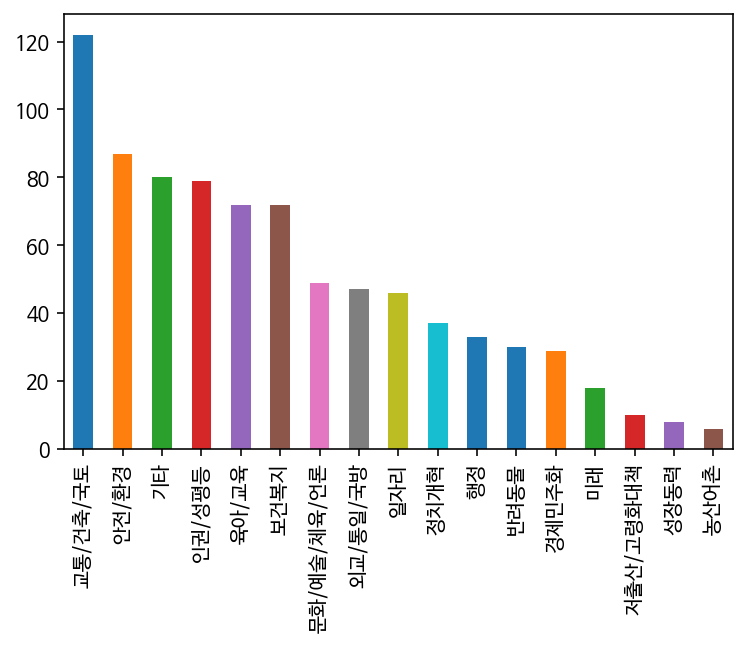

In [58]:
# 잘못 예측한 데이터를 bar-plot으로 뽑아보면 교통/건축/국토 항목이 제일 많습니다.
predict_incorrect_value.plot(kind='bar')

# 왜 예측의 정확도가 낮을까요?
* 청원을 입력하는 사람마다 카테고리 분류 기준이 정확하지 않은 것 같습니다.
* 기타로 예측한 분류도 특정 카테고리로 분류해도 될 것으로 보여집니다.

In [59]:

predict_incorrect[['category', 'category_pred', 'title', 'content']].head(10)

,category,category_pred,title,content
279887,성장동력,육아/교육,구글G- city사업을 청라 유치 원안대로 하게 해주세요,대통령님 안녕하십니까?\n청라주민입니다.\n최근 g city와 관련하여 말씀드립니다...
279918,육아/교육,인권/성평등,양육비 미지급 사건에 대한 대책마련 청원,법률사무소 지청 정훈태 변호사입니다.\n미혼모나 부부가 이혼할 경우 양육비부담자가 ...
279982,기타,육아/교육,스포츠토토(베트맨) 국민 피 빨아먹는 짓 중단하게 해주세요,현재 한국의 스포츠토토는 10년이 훌쩍 지난 것으로 알고 있습니다. 하지만 최근에 ...
280324,외교/통일/국방,보건복지,강명구 평화마라토너의 북한 입국을 위한 정부의 지원을 청원합니다,"한반도 평화의 전령, 강명구 평화마라토너는 꼭 1년 전 네덜란드 헤이그 이준열사 기..."
280401,교통/건축/국토,육아/교육,"문재인 대통령님, 약속을 지켜주세요..",문재인 대통령님 약속을 지켜 주세요..\n대통령님께서는 2016년에 우리 입주민들과...
280432,교통/건축/국토,안전/환경,현기차에바가루 개선안해줘요?,얘기들차만타면 기침하고 눈도 아플뿐더러 눈에 통증과 가려움 폐를 쿡쿡찌르는듯한 아픔...
280506,교통/건축/국토,보건복지,"국토부는 고양시 추가 공공택지 아파트 공급을 철회하고 자족도시, 기업도시로 되도록...",서울집값 잡기용이라는 방향부터 잘못된 목적에 따라 추석 전에 발표가 예정된 수도권 ...
280724,인권/성평등,육아/교육,일본군성노예제 피해자를 더 이상 힘들게 하지 말고 하루빨리 화해치유재단을 해산하여 ...,정부에서 지난 1월 9일 2015한일합의 후속조치 마련계획을 발표하고 8개월 동안 ...
280777,정치개혁,안전/환경,고양시 공무원 차안에 90분 감금한 행안부 감사관 파면 구속 청원합니다,언론 보도에 지난 8. 30일 고양시 공무원을 감사나온 행안부 감...
281804,육아/교육,문화/예술/체육/언론,어린이집 원장이 도둑년입니까?,군대 빼고 다들어오는 지도점검이며 온갖 감사에도 버텼습니다..\n말도 안되는 서류들...


In [60]:
# 원래 데이터 중 기타로 분류되었으나 분류기가 다르게 예측한 청원을 확인합니다. 
predict_incorrect_etc = predict_incorrect.loc[predict_incorrect['category'] == '기타'].copy()
predict_incorrect_etc[['category', 'category_pred', 'title', 'content']].head(10)

# 밑을 보면 기타로 분류되었지만 사실상 예측된 카테고리 분류는 다른 쪽으로 된 것을 확인할 수 있습니다. 

,category,category_pred,title,content
279982,기타,육아/교육,스포츠토토(베트맨) 국민 피 빨아먹는 짓 중단하게 해주세요,현재 한국의 스포츠토토는 10년이 훌쩍 지난 것으로 알고 있습니다. 하지만 최근에 ...
287766,기타,보건복지,대대적인 사기극에 휘말린것 같습니다.,대대적익 사기극에 휘말린거같아 민원드립니다.\n피해 본사람만해도 수백명입니다.\n리...
288502,기타,보건복지,의료사고로피눈물을흘리는사연들주세요,진 정 서\n수 신 : 문재인 대통령님\n참 조 : 비서실장님\n발 신 : ...
289388,기타,반려동물,유투버 이환의 유튜브활동을 금지해주세요.,온갖 잘못을 저지르고도 반성하기는 커녕 당당히 영상을 올리는 추악한 이환의 유투버 ...
292008,기타,교통/건축/국토,방시혁에게 피드백을 요구합니다.,우익 여혐인 아키모토 야스시와 협엽한 빅히트 엔터테이먼트 방시혁에게 피드백을 요구합...
292734,기타,인권/성평등,서울대학병원 4개월영아 의료사고사망사건!,이글을 꼭 읽어주시기 부탁드립니다!\n안녕하세여 여러분\n바쁘시더라도 제 억울한 ...
295331,기타,정치개혁,자한당 심재철 의원실의 정부 예산정보 무단 열람을 철저히 조사하라!,기재부는 자한당 심재철 의원실이 정부와 청와대 등 국가기관이 사용하는 시스템에 들어...
295592,기타,보건복지,동물원 폐지해주세요.,안녕하세요. 저는 대전에 거주하고 있는 한 학생입니다. 오늘 대전 동물원에서 탈출한...
297847,기타,정치개혁,더이상 경기도의 중산층을 수탈하여 서울의 상류층을 살찌우는 정책을 펴지 말기 바랍니다.,이번 9.21 부동산 대책에 실망한 사람입니다.\n지금 경기도는 막대한 미분양 물량...
297986,기타,보건복지,김종천 의전비서관 제명을 해주세요,이번 9월 평양 방문으로 고생하신 대통령님께 다시한번 감사의 말씀을 드립니다.\n하...
